<a href="https://colab.research.google.com/github/SerbC/PAIC/blob/main/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import glob
import cv2
import random as random
import numpy as np
import matplotlib.pyplot as plt

In [5]:
base_path = "/content/drive/My Drive/fac/Laborator/Images/"

image_path_by_class = []
for i in range(4):
  c_p = base_path + str(i) + "/*.jpg"
  image_path_by_class.append(glob.glob(c_p))
print(image_path_by_class)

[['/content/drive/My Drive/fac/Laborator/Images/0/7.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/0.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/1.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/2.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/3.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/4.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/5.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/6.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/8.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/9.jpg'], ['/content/drive/My Drive/fac/Laborator/Images/1/6.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/0.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/2.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/1.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/3.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/4.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/5.jpg', '/content/drive/My Drive/fac/Laborator/Image

In [14]:
#amestecam baza de date
for a in image_path_by_class:
  random.shuffle(a, lambda: .5)
print(image_path_by_class)

[['/content/drive/My Drive/fac/Laborator/Images/0/0.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/6.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/7.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/8.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/3.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/2.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/9.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/1.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/4.jpg', '/content/drive/My Drive/fac/Laborator/Images/0/5.jpg'], ['/content/drive/My Drive/fac/Laborator/Images/1/7.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/4.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/5.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/9.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/6.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/1.jpg', '/content/drive/My Drive/fac/Laborator/Images/1/8.jpg', '/content/drive/My Drive/fac/Laborator/Image

In [18]:
#train test split
train_lb = []
test_lb = []
for a in image_path_by_class:
  cls_t = []
  cls_v = []
  for i, e in enumerate(a):
    if i < 7:
      cls_t.append(e)
    else:
      cls_v.append(e)
  train_lb.append(cls_t)
  test_lb.append(cls_v)

In [19]:
#incarcam imagini
train =[]
test =[]
for cls in train_lb:
  tmp=[]
  for e in cls:
    im = cv2.imread(e)
    tmp.append(im)
  train.append(tmp)
for cls in test_lb:
  tmp=[]
  for e in cls:
    im = cv2.imread(e)
    tmp.append(im)
  test.append(tmp)


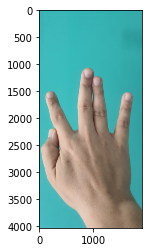

In [25]:
plt.figure()
plt.imshow(train[0][0][...,::-1])#::-1 inverseaza canalele din BGR in RGB, ca sa nu arat a strumf 

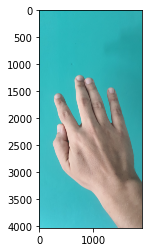

In [26]:
plt.figure()
plt.imshow(test[0][0][...,::-1])

In [27]:
print(np.shape(test[0][0])) #am determinat ca imaginile sunt mult prea mari pentu a lucra cu ele eficient

(4032, 1908, 3)


(640, 480, 3)


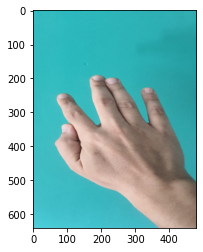

In [30]:
#corect ar fi sa mergem pe un procent din dimensiunea originala. 
for i, cls in enumerate(train):
  for j, im in enumerate(cls):
    r = cv2.resize(im,(480,640))#numere scoase din burta
    train[i][j] = r
for i, cls in enumerate(test):
  for j, im in enumerate(cls):
    r = cv2.resize(im,(480,640))#numere scoase din burta
    test[i][j] = r
plt.figure()
plt.imshow(test[0][0][...,::-1])
print(np.shape(test[0][0])) 

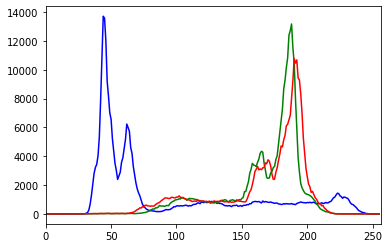

In [31]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([test[0][0][...,::-1]],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

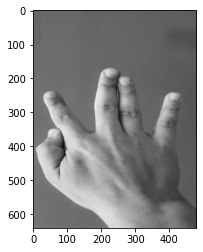

In [56]:
#facut imaginile gray folosind doar R si G
train_g =[]
test_g =[]
for cls in train:
  tmp =[]
  for im in cls:
    mean = np.mean((im[:,:,1], im[:,:,2]),axis=0).astype(np.uint8)
    tmp.append(mean)
  train_g.append(tmp)
for cls in test:
  tmp =[]
  for im in cls:
    mean = np.mean(( im[:,:,1], im[:,:,2]),axis=0).astype(np.uint8)
    tmp.append(mean)
  test_g.append(tmp)
plt.figure()
plt.imshow(train_g[0][0], cmap="gray")

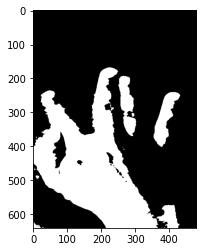

In [70]:
#incercam sa obtinem o masca pentru mana
#de aici faceti voi multe for-uri
img = train_g[0][0]

#prima oara trebuie neaparat un blur
kernel = np.ones((5,5),np.float32)/25
img = cv2.filter2D(img,-1,kernel)

# th = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)#meh
ret,th = cv2.threshold(img,130,255,cv2.THRESH_BINARY)
plt.figure()
plt.imshow(th, cmap="gray")

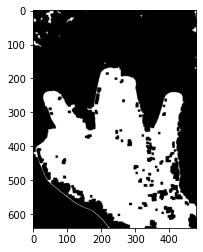

In [91]:
img = train_g[0][0]

# kernel = np.ones((5,5),np.float32)/25
# img = cv2.filter2D(img,-1,kernel)
kernel = np.ones((7,7),np.uint8)

edges = cv2.Canny(img,10,40)
edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)


plt.figure()
plt.imshow(edges, cmap="gray")